In [1]:
!pip install basicsr realesrgan
!pip install torch torchvision --upgrade

In [2]:
import cv2
import torch
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
from torchvision.transforms.functional import rgb_to_grayscale

In [3]:
from basicsr.archs.rrdbnet_arch import RRDBNet # the model itself
from realesrgan import RealESRGANer # framework that uses the model
# update the degradations.py line number 8 from "functional_tensor" -> "functional"

Upload the retinal scan to be analised

In [4]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

original_img = image.load_img(image_path)

Saving DME-1102486-1.jpeg to DME-1102486-1.jpeg


Upload pretrained enhance model and update filepath

In [5]:
model_path = "/content/RealESRGAN_x4plus (1).pth"
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

In [6]:
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
pretrained_dict = torch.load(model_path, map_location=torch.device('cpu'))

model.load_state_dict(pretrained_dict['params_ema'], strict=False)

upScaler = RealESRGANer(
    scale=2,
    model_path=model_path,
    model=model,
    tile=0,
    tile_pad=10,
    pre_pad=0,
    half=True
)

img = Image.open(image_path).convert('RGB')
img = np.array(img)

output, _ = upScaler.enhance(img, outscale=2)
output_img = Image.fromarray(output)
output_img.save('output.png')

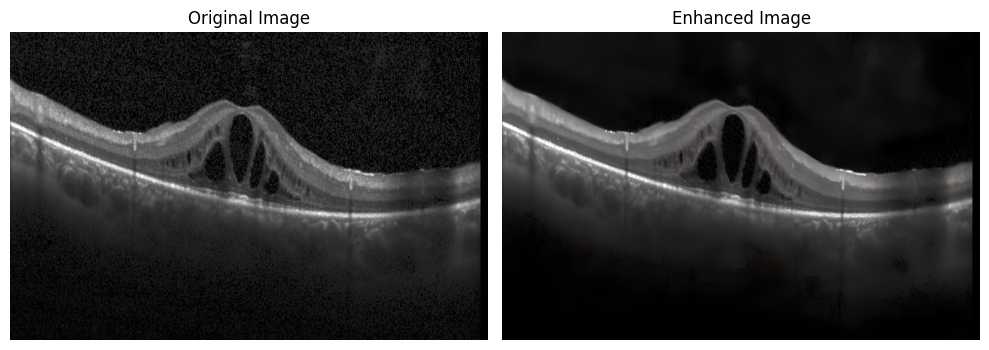

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(output_img)
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
